# Travel Company Package Prediction Case Study

## Problem Statement:

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Data Description:

Holiday_Package.csv is a dataset that contains the details of 872 employees of company

## Domain:
Tour and Travel

## Context:
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Attribute Information:

 - Holiday_Package : Opted for Holiday Package yes/no?
 - Salary : Employee salary
 - age : Age in years
 - edu : Years of formal education
 - no_young_children : The number of young children (younger than 7 years)
 - no_older_children : Number of older children
 - foreign 	: foreigner Yes/No

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

## Read the data into the notebook


In [1213]:
df2= pd.read_csv('Holiday_Package.csv',index_col=0)

In [1214]:
# taking backup copy
df2_bkp = df2.copy()

In [1215]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


In [1216]:
df2.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
868,no,40030,24,4,2,1,yes
869,yes,32137,48,8,0,0,yes
870,no,25178,24,6,2,0,yes
871,yes,55958,41,10,0,1,yes
872,no,74659,51,10,0,0,yes


## Exploratory Data Analysis 
 ## Checking the data types /information


In [1217]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


The data set contains 872 observations of data and 7 features.  Since non null count is same in every column variable except depth,  there appears no null data.

## Checking the shape (Number of rows and columns)

In [1218]:
df2.shape

(872, 7)

## Checking for duplicates

In [1219]:
# Check for duplicate data

dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df2[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


No duplicated data is present.


# Univariate Analysis

In [1220]:
# creating a function to return CV, skew, IQR, Upper range, lower range of dataframe
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    numeric_col_names=df.select_dtypes(exclude='object').columns
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))

    return CV, Skew, IQR,  UR, LR    


In [1221]:
def calc_rows(Col_list,no_of_graph_row=4):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

## Checking for summary

In [1222]:
df2_summ=pd.DataFrame(df2.describe().round(4))


## Checking IQR, Coeffiecient of Variation, IQR, lower range and upper range of numerical cols

In [1223]:
df2_summ.loc["CV"],df2_summ.loc["Skew"],df2_summ.loc["IQR"],df2_summ.loc["UR"],df2_summ.loc["LR"]= CV_row(df2)

In [1224]:
df2_summ.round(4).T

,count,mean,std,min,25%,50%,75%,max,CV,Skew,IQR,UR,LR
Salary,872.0,47729.1720,23418.6685,1322.0,35324.0,41903.5,53469.5,236961.0,0.49,3.10,18145.5,80687.75,8105.75
age,872.0,39.9553,10.5517,20.0,32.0,39.0,48.0,62.0,0.26,0.15,16.0,72.00,8.00
educ,872.0,9.3073,3.0363,1.0,8.0,9.0,12.0,21.0,0.33,-0.05,4.0,18.00,2.00
no_young_children,872.0,0.3119,0.6129,0.0,0.0,0.0,0.0,3.0,1.96,1.95,0.0,0.00,0.00
no_older_children,872.0,0.9828,1.0868,0.0,0.0,1.0,2.0,6.0,1.11,0.95,2.0,5.00,-3.00


From summary, we can see that :-

- max salary(236K) is very high as compared to mean(47K) and median(42K). Hence it contains outlier
- Mean and median of age are approximately similar 39-40. It doesnt contains outlier. 
- Education middle 50% of data lies in between 8 to 12 range with few outliers.
- Most employees have no of young children as 0.
- Most of the employees have 1 child who is older than 7 years
- All the columns are positively skewed except education

## Checking for missing values

In [1225]:
# Check for missing value in any colum
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df2)

,Total,Percent
Holliday_Package,0,0.0
Salary,0,0.0
age,0,0.0
educ,0,0.0
no_young_children,0,0.0
no_older_children,0,0.0
foreign,0,0.0


We can confirm that there are no NULL values in the data

## Check for Outliers (Which all variables have an outlier?)

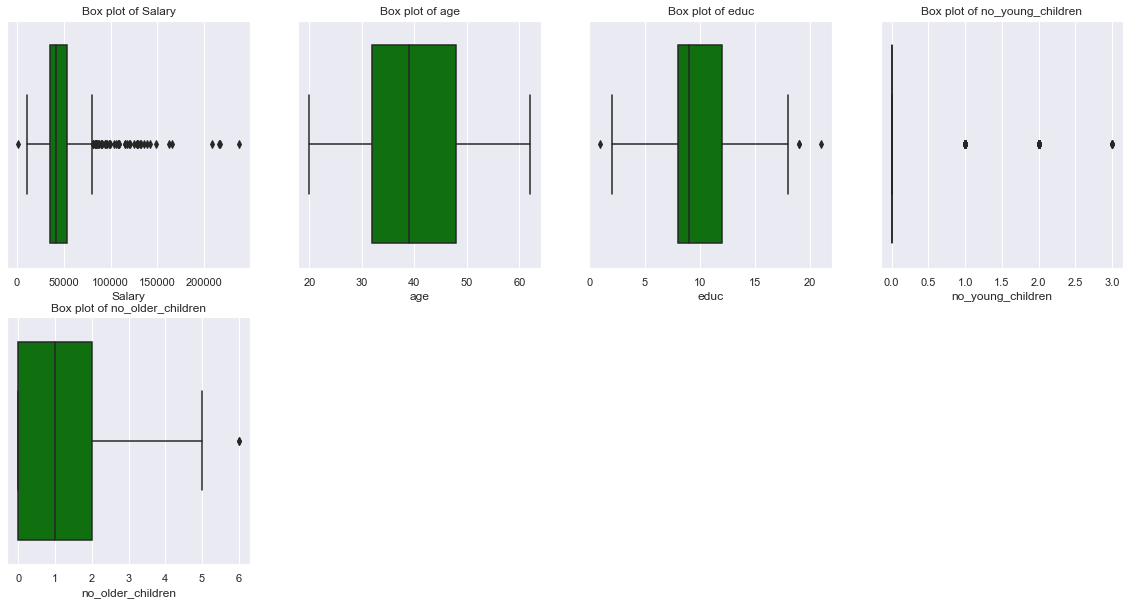

In [1226]:
# Checking for Outliers
numeric_col_names=df2.select_dtypes(exclude='object').columns
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
sns.set(font_scale=1)
plt.figure(figsize= (20,10))
box_plot_no=1
for col in df2.columns :
    if (col in numeric_col_names):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df2 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


As evident from above box plot, there are many outliers in salary column.

education, no of young childern and old children columns have very few outliers which we can ignore

## Plot the Histograms

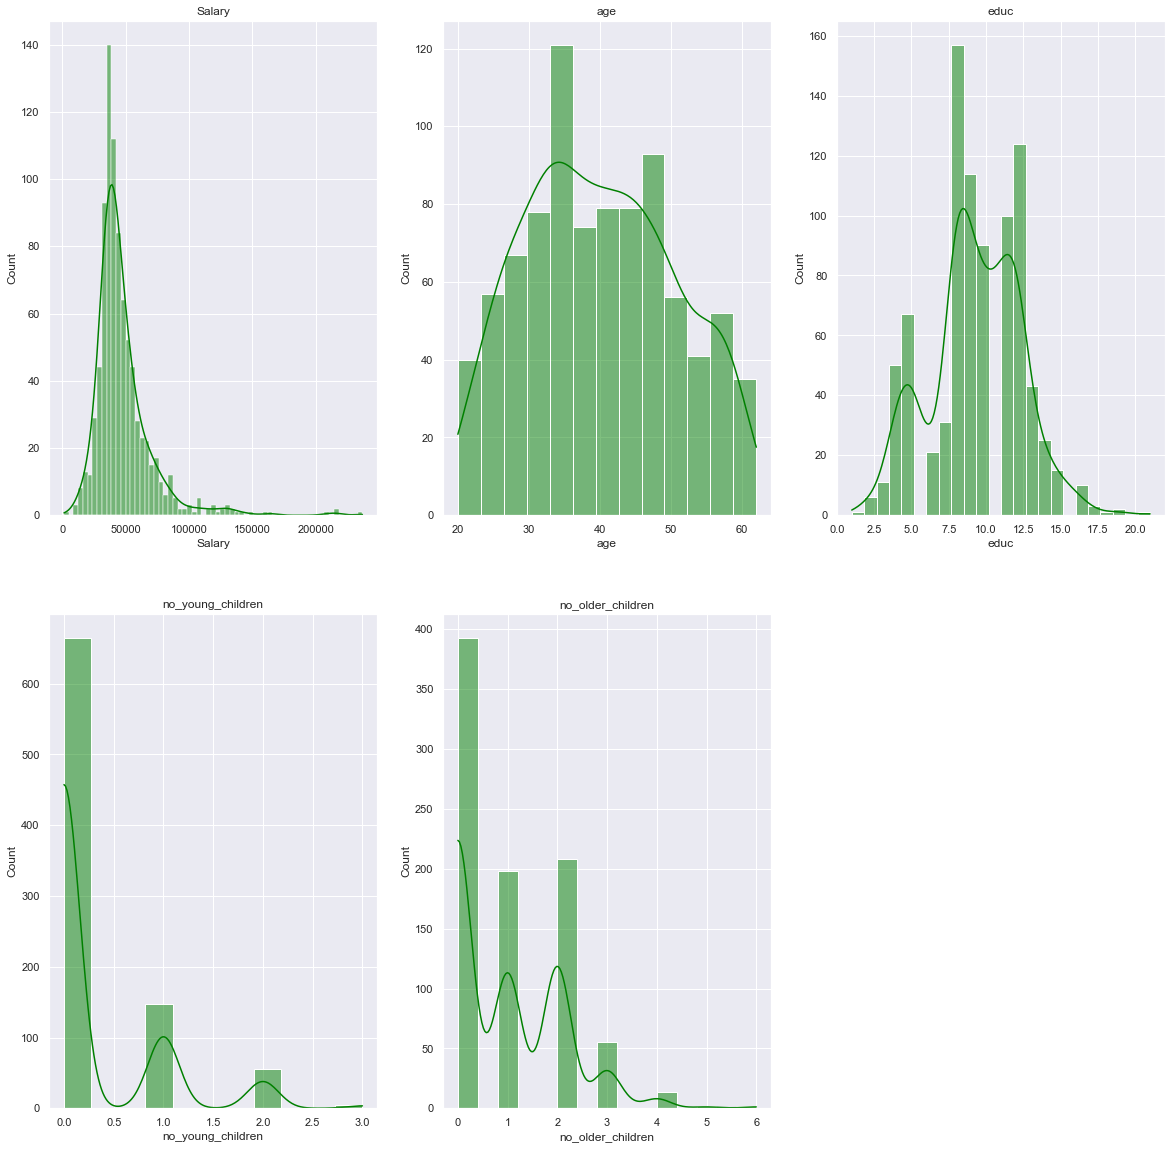

In [1227]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in df2.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df2[col] ,color='green',kde=True).set(title =distplot_title)
        distplot_no = distplot_no + 1 


###### From histograms we can see that 
 - Salary range is 0-100000 for most of the employees. However few employees are getting more salary causing skewness
 - Age appears to be normally distributed
 - Around 650 employees out of 872 have their young children as 0.
 - Around 380 out of 872 employees have no of older children as 0
 - Education middle 50% of data lies in between 8 to 12 range with few outliers.

### Correcting Spelling error in Column names

In [1228]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [1229]:
df2.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True)

In [1230]:
df2.rename(columns={'Holiday_Package':'HolidayPackage','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children','foreign':'Foreign'},inplace=True)

In [1231]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

# Bi-variate, and multivariate analysis

## Checking the unique values for categorical variables

In [1232]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column,': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

HolidayPackage :  2
yes    401
no     471
Name: HolidayPackage, dtype: int64


Foreign :  2
yes    216
no     656
Name: Foreign, dtype: int64




## Swarm Plots

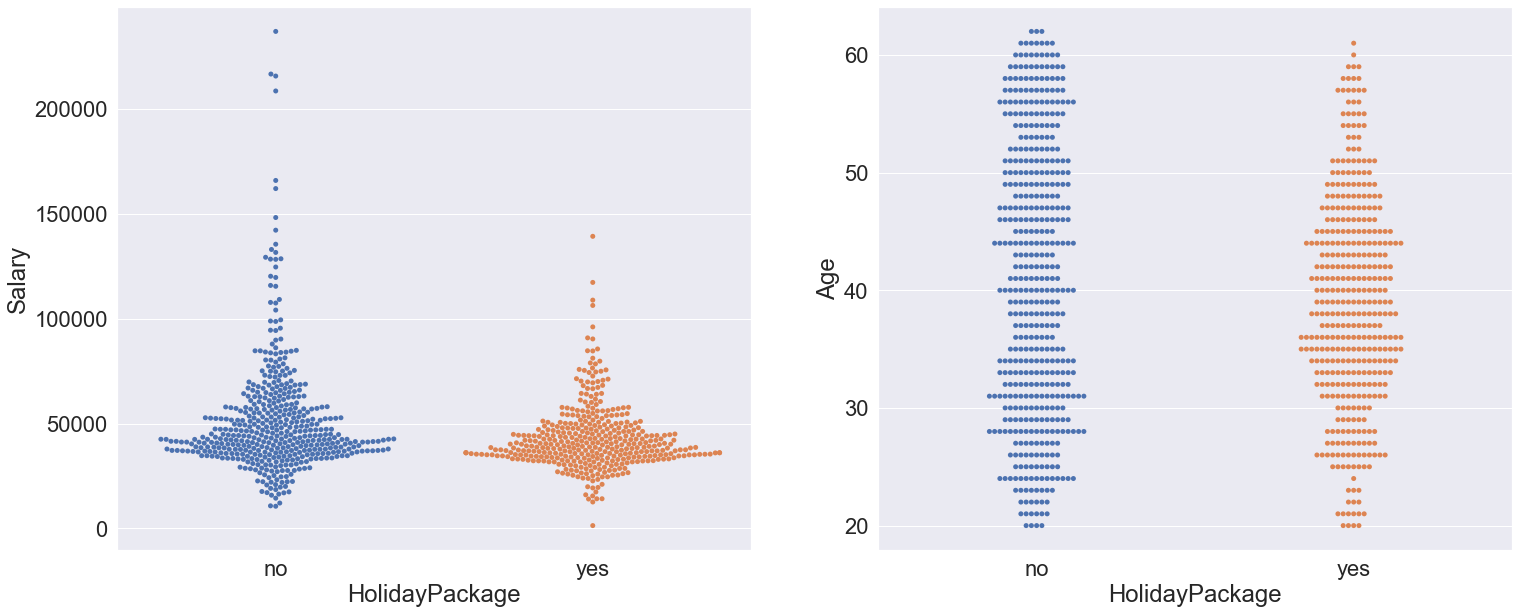

In [1233]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=df2,x='HolidayPackage', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df2,x='HolidayPackage', y='Age')


We can see that as:-
As Salary increases to the max value, employees count increases for the not opting for the holiday package.
As Age increases beyond 50 level, less emplyees opt for the holiday package

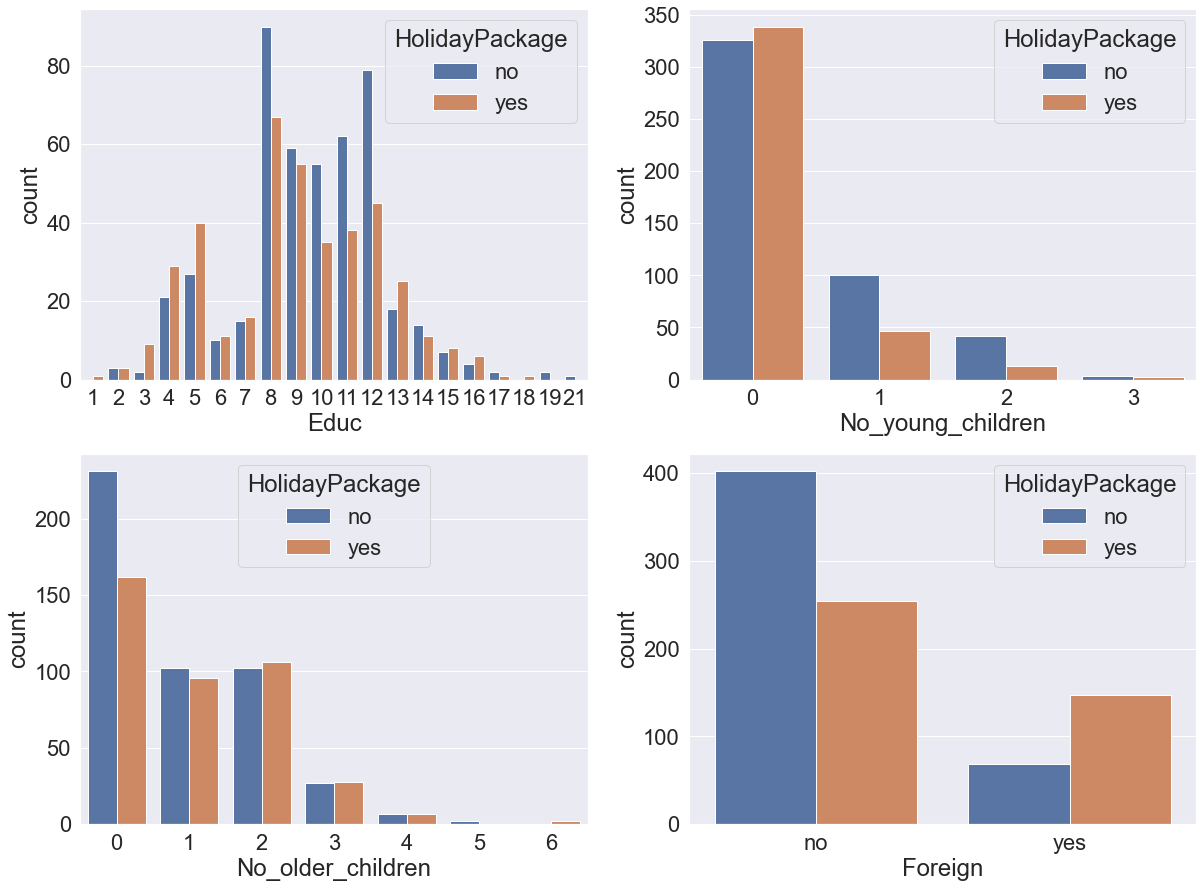

In [1234]:
### Count plot
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df2,hue='HolidayPackage', x='Educ')
plt.subplot(2,2,2)
sns.countplot(data=df2,hue='HolidayPackage', x='No_young_children')
plt.subplot(2,2,3)
sns.countplot(data=df2,hue='HolidayPackage', x='No_older_children')
plt.subplot(2,2,4)
sns.countplot(data=df2,hue='HolidayPackage', x='Foreign')


- More Employess opt for Tours if their education level is 3,4,5,6,7,13,14,15,16
- Employees dont opt for tours if they have young child
- Older children count doesnt appearst to have much impact on tour opted by employees or not
- Foreigner employees tends to opt more for the tour

In [1325]:
pd.crosstab(df2['No_young_children'],df2['HolidayPackage'],margins=True)

HolidayPackage,0,1,All
No_young_children,,,
0,326,339,665
1,100,47,147
2,42,13,55
3,3,2,5
All,471,401,872


We can see that around 24% of employees have one or more young child.
Out of these employees, 70% ((100+42+3)/(147+55+5)) are not opting for tours.

In [1329]:
(100+42+3)/(147+55+5)

0.7004830917874396

In [1324]:
pd.crosstab(df2['Foreign'],df2['HolidayPackage'],margins=True)

HolidayPackage,0,1,All
Foreign,,,
0,402,254,656
1,69,147,216
All,471,401,872


As per the data, we can say that 68% of foreign employees are opting for the tour packages.

### Correlation matrix

In [1235]:
Cor=df2.corr().round(2)
Cor

,Salary,Age,Educ,No_young_children,No_older_children
Salary,1.00,0.07,0.33,-0.03,0.11
Age,0.07,1.00,-0.15,-0.52,-0.12
Educ,0.33,-0.15,1.00,0.10,-0.04
No_young_children,-0.03,-0.52,0.10,1.00,-0.24
No_older_children,0.11,-0.12,-0.04,-0.24,1.00


### Heat Map

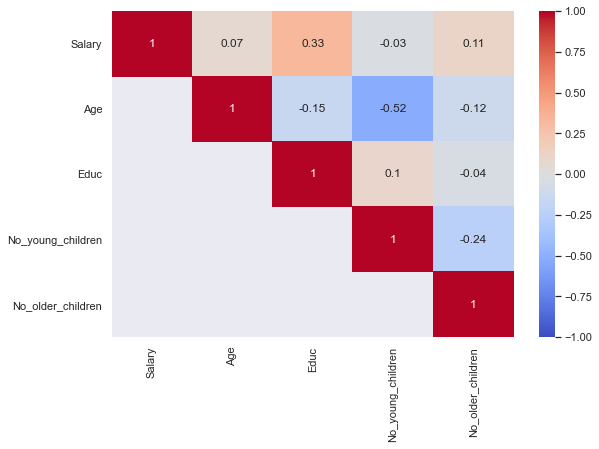

In [1236]:
# plot the correlation coefficients as a heatmap
## Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

We can see in heatmap & correlation matrix that  
  - Salary has correlation with educ. 
  - Age is negatively correlated with No_young_children
  

### Pairplot

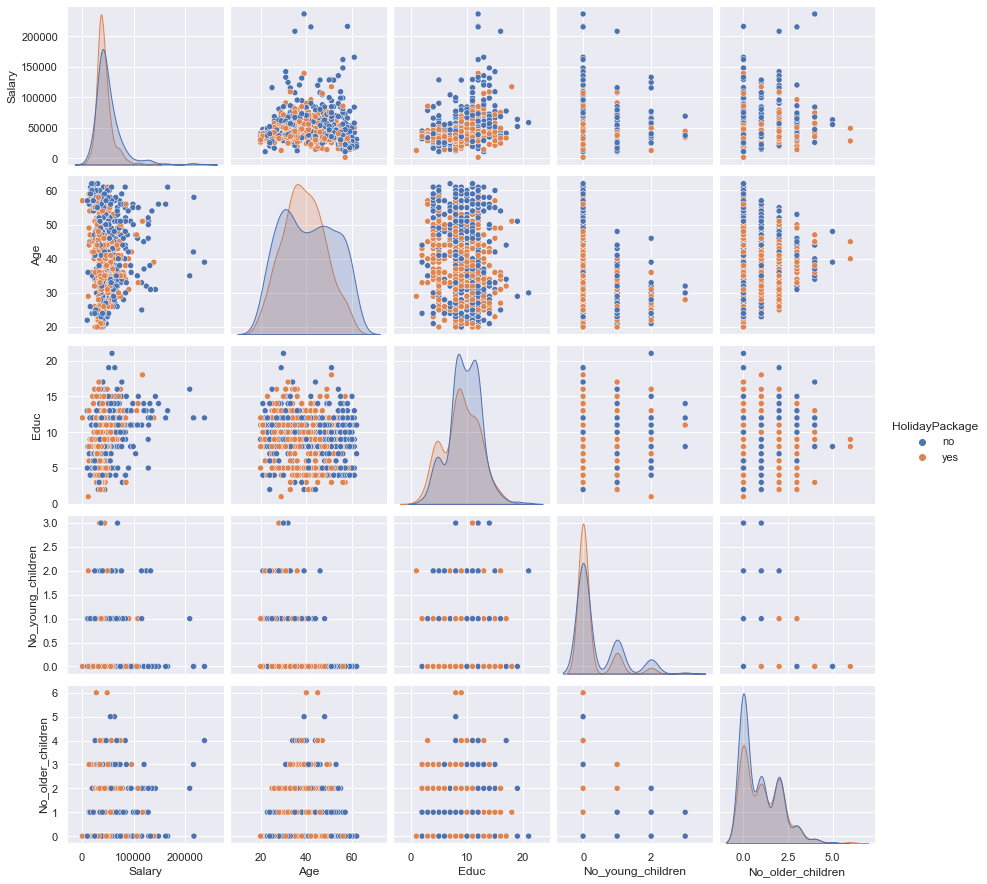

In [576]:
sns.pairplot(df2,hue='HolidayPackage',diag_kind='kde')

As depicted in heat map of correlation matrix, we can see that no of young children negatively correlated with age.

Salary is slightly correlated with Educ

## VIF Checking for Multicollinearity

In [577]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [578]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [579]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [580]:
X = df2[['Salary','Age','Educ','No_young_children','No_older_children']]
checkvif(X)

           Variables       VIF
0             Salary  6.027872
1                Age  6.832751
2               Educ  8.890845
3  No_young_children  1.403995
4  No_older_children  1.817912


We can see that VIF is greator than 5 for salary, age and education. However its value is less than 10. So dataset has some multicollinearity

## Outlier treatment (flooring and capping)

In [1272]:
# taking backup copy
#df2_bkp1=df2.copy()

We are only doing outlier treatment for Salary attribute as other columns have very less outliers and that are near lower and upper ranges


In [1273]:
df2=Outlier_treatment(df2,numeric_col_names[0])

col: Salary ,lower range : 8105.75 ,upper range: 80687.75 ,No of outliers: 57 ,outlier %: 6.54


C:\Users\Raghav Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


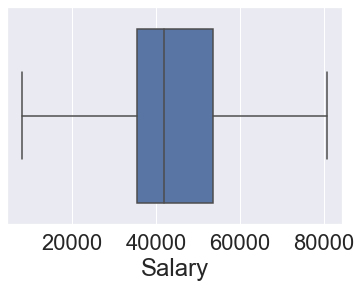

In [1274]:
sns.boxplot(df2['Salary'])

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

## Scaling

Scaling is not required for the logistic regression model. Hence its not performed here

In [1275]:
df2_bkp2=df2.copy()


### Encoding object data to Numerical

In [1238]:
df2.HolidayPackage.replace(['yes','no'],[1,0],inplace=True)
#df2.Foreign.replace(['yes','no'],[1,0],inplace=True)


In [1239]:
df2.HolidayPackage.value_counts()

0    471
1    401
Name: HolidayPackage, dtype: int64

In [1240]:
df2.HolidayPackage.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: HolidayPackage, dtype: float64

In [1241]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HolidayPackage     872 non-null    int64 
 1   Salary             872 non-null    int64 
 2   Age                872 non-null    int64 
 3   Educ               872 non-null    int64 
 4   No_young_children  872 non-null    int64 
 5   No_older_children  872 non-null    int64 
 6   Foreign            872 non-null    object
dtypes: int64(6), object(1)
memory usage: 86.8+ KB


In [1242]:
df2 = pd.get_dummies(df2,drop_first=True)
df2.head()

,HolidayPackage,Salary,Age,Educ,No_young_children,No_older_children,Foreign_yes
1,0,48412,30,8,1,1,0
2,1,37207,45,8,0,1,0
3,0,58022,46,9,0,0,0
4,0,66503,31,11,2,0,0
5,0,66734,44,12,0,2,0


In [1276]:
df2.Foreign.value_counts()

0    656
1    216
Name: Foreign, dtype: int64

In [1244]:
df2.rename(columns={'Foreign_yes':'Foreign'},inplace=True)

In [1245]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   HolidayPackage     872 non-null    int64
 1   Salary             872 non-null    int64
 2   Age                872 non-null    int64
 3   Educ               872 non-null    int64
 4   No_young_children  872 non-null    int64
 5   No_older_children  872 non-null    int64
 6   Foreign            872 non-null    uint8
dtypes: int64(6), uint8(1)
memory usage: 80.8 KB


### Train-Test Split

In [1277]:
# Copy all the predictor variables into X dataframe
#X = df2.drop(['HolidayPackage','Educ','No_older_children'], axis=1)
X = df2.drop(['HolidayPackage'], axis=1)
#X = df1[['carat','depth']]

# Copy target into the y dataframe. 
y = df2[['HolidayPackage']]

In [1278]:
X.head()

,Salary,Age,Educ,No_young_children,No_older_children,Foreign
1,48412.0,30,8,1,1,0
2,37207.0,45,8,0,1,0
3,58022.0,46,9,0,0,0
4,66503.0,31,11,2,0,0
5,66734.0,44,12,0,2,0


In [1279]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [1280]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df2.shape)


(610, 6)
(262, 6)
(610, 1)
(262, 1)
(872, 7)


In [1281]:
y_train.value_counts(normalize=True)

HolidayPackage
0                 0.539344
1                 0.460656
dtype: float64

In [1282]:
y_test.value_counts(normalize=True)

HolidayPackage
0                 0.541985
1                 0.458015
dtype: float64

### Logistic Regression Model




#### creating user define function so to run model multiple times for different grid search parameters

In [1283]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [1284]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

In [1285]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   12.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [1286]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [1287]:
ytest_predict_prob=model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

## Model Evaluation

In [1288]:
# Accuracy - Training Data
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for training dataset',model.score(X_test, y_test))

Model score for training dataset 0.6672131147540984
Model score for training dataset 0.648854961832061


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.733
AUC for test dataset: 0.733


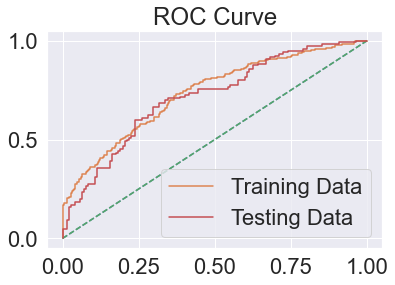

In [1289]:
# predict probabilities
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

In [1290]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

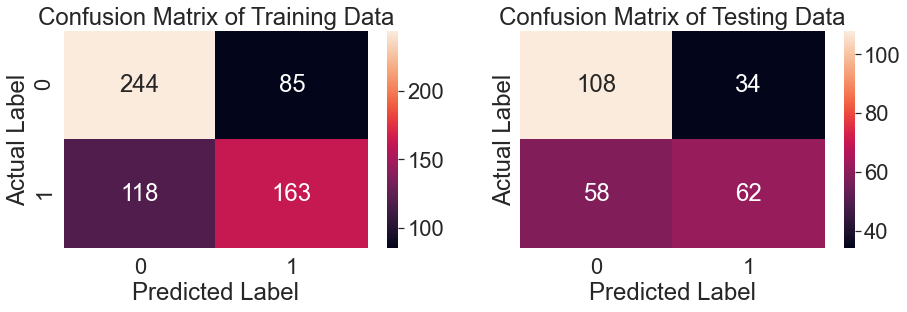

In [1291]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [1292]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



## Applying GridSearchCV for Logistic Regression

In [1293]:
grid={'penalty':['l2','none','l1'],   
      'solver':['lbfgs','liblinear'],   # 'newton-cg',
      'tol':[0.0001,0.00001]}

In [1294]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [1295]:
#grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv_value=3
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search


 Showing best parameters for the grid search

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262



C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


In [1296]:
best_model = grid_search.best_estimator_

In [1297]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [1298]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

## Model Evaluation

In [1299]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for training dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.6639344262295082
Model score for training dataset 0.6564885496183206


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.733
AUC for test dataset: 0.733


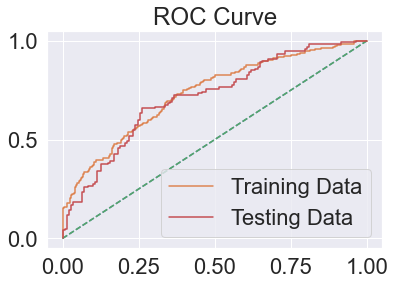

In [1300]:
# predict probabilities
probs_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

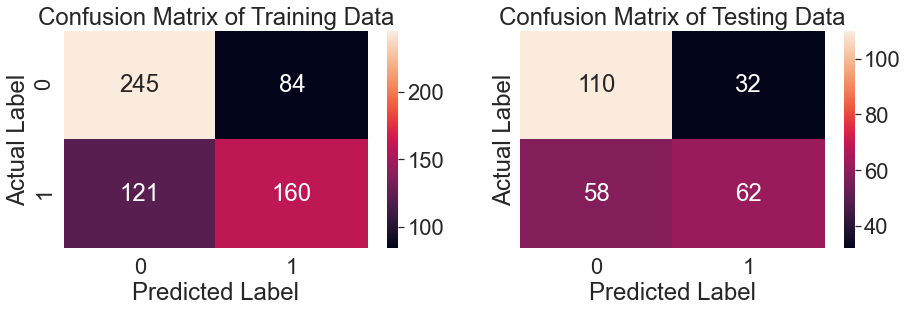

In [1301]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [1302]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



## Getting the equation

In [1303]:
## Import the model
import statsmodels.formula.api as sm

In [1304]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [1305]:
A1 = 'HolidayPackage ~Salary+Age+Educ+No_young_children+No_older_children+Foreign'

In [1306]:
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.1244
Time:                        19:55:01   Log-Likelihood:                -526.78
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.138e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5432      0.559      4.550      0.000       1.448       3.639
Salary            -2.088e-05   5.26e-06     -3.970      0.000   -3.12e-05   -1.06e-05
Age                  -0.0496      0.009     -5.491      0.000      -0.067      -0.032
Educ                  0.0342      0.029      1.172      0.241      -0.023       0.091
No_young_children    -1.3287      0.180     -7.386      0.000      -1.681      -0.976
No_older_children    -0.0251      0.074     -0.341      0.733      -0.169       0.119
Foreign               1.3037      0.200      6.519      0.000       0.912       1.696
=====================================================================================
"""

We can see that the p value of No_older_children is the highest (.733) and it is greator than 0.05. 

Hence it confirms that No_older_children attribute has no impact on dependent variable HolidayPackage

In [1307]:
A1 = 'HolidayPackage ~Salary+Age+Educ+No_young_children+Foreign'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604175
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.1243
Time:                        19:55:02   Log-Likelihood:                -526.84
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.671e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.4783      0.525      4.724      0.000       1.450       3.506
Salary            -2.117e-05   5.19e-06     -4.079      0.000   -3.13e-05    -1.1e-05
Age                  -0.0487      0.009     -5.677      0.000      -0.065      -0.032
Educ                  0.0351      0.029      1.209      0.227      -0.022       0.092
No_young_children    -1.3080      0.169     -7.747      0.000      -1.639      -0.977
Foreign               1.3028      0.200      6.517      0.000       0.911       1.695
=====================================================================================
"""

We can see that the p value of Educ is the highest (.277) and it is greator than 0.05. 

Hence it confirms that Educ attribute has no impact on dependent variable HolidayPackage

In [1308]:
A1 = 'HolidayPackage ~Salary+Age+No_young_children+Foreign'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.605017
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.1231
Time:                        19:55:02   Log-Likelihood:                -527.58
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 5.267e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8128      0.448      6.282      0.000       1.935       3.690
Salary            -1.932e-05   4.94e-06     -3.911      0.000    -2.9e-05   -9.64e-06
Age                  -0.0504      0.008     -5.962      0.000      -0.067      -0.034
No_young_children    -1.3023      0.169     -7.707      0.000      -1.633      -0.971
Foreign               1.2092      0.183      6.592      0.000       0.850       1.569
=====================================================================================
"""

Now all p values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable HolidayPackage.

Also we can see that coef value is highest for No_young_children followed by foreign, Age and salary

Salary coefficient value is very low i.e -00001932. So its impact is almost 0 on dependent variable

In [1309]:
model_1.params

Intercept            2.812780
Salary              -0.000019
Age                 -0.050426
No_young_children   -1.302317
Foreign              1.209164
dtype: float64

In [1310]:
for i,j in np.array(model_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.81) * Intercept + (-0.0) * Salary + (-0.05) * Age + (-1.3) * No_young_children + (1.21) * Foreign + 

### Logistics Regression Conclusion



<b>Train Data: </b>

    AUC: 73%
    Accuracy: 66%
    Precision: 66%
    f1-Score: 61%
    Recall: 57%

<b>Test Data: </b>

    AUC: 73%
    Accuracy: 66%
    Precision: 68%
    f1-Score: 58%
    Recall: 52%


**Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..**

With accuracy of 66% and recall rate of 52%, model is only able to predict 52% of total tours which were actually claimed as claimed.

Precision is 68% of test data which means, out of total employees predicted by model as opt for tour, 68% employees actually opted for the tour

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

#### As Recall rate of test dataset is very poor around 52% thus this doesnt looks good enough for classification 

#### Logistic regression equation is as shown below :-

Log (odd) = (2.81)  + (-0.0) * Salary + (-0.05) * Age + (-1.3) * No_young_children + (1.21) * Foreign

We can see that salary coefficient is very small , this it can be removed. So our equation would become :-

Log (odd) = (2.81)  +  (-0.05) * Age + (-1.3) * No_young_children + (1.21) * Foreign

Most important attribute here is No of young children followed by Foreign and age

### LDA Model

In [669]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [671]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Prediction

In [672]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

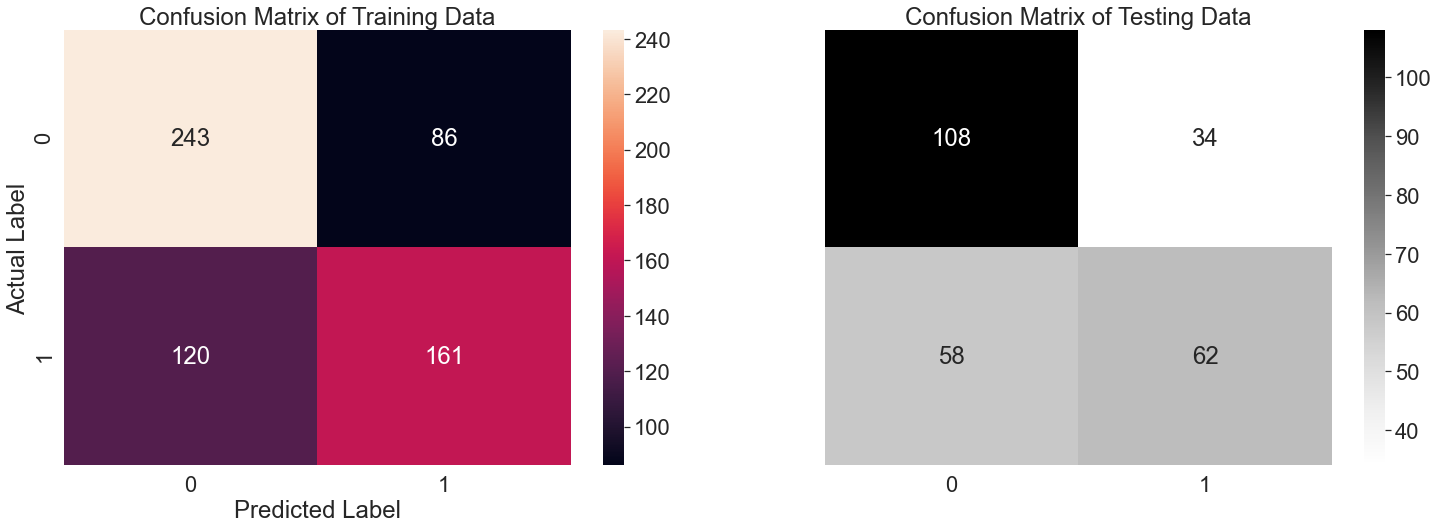

In [685]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [687]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



### Probability prediction for the training and test data

In [688]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [690]:
#pred_prob_train[:,1]

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


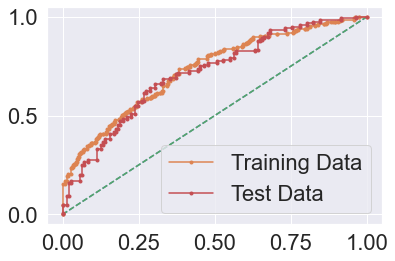

In [1189]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LDA Conclusion



<b>Train Data: </b>

    AUC: 73%
    Accuracy: 66%
    Precision: 65%
    f1-Score: 61%
    Recall: 57%

<b>Test Data: </b>

    AUC: 71%
    Accuracy: 65%
    Precision: 65%
    f1-Score: 57%
    Recall: 52%


**Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..**

With accuracy of 65% and recall rate of 52%, model is only able to predict 52% of total tours which were actually claimed as claimed.

Precision is 65% of test data which means, out of total employees predicted by model as opt for tour, 65% employees actually opted for the tour

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

#### As Recall rate of test dataset is very poor around 52% thus this doesnt looks good enough for classification 

## Running other Classification models

## Scaling

In [1190]:
ss=StandardScaler() 


In [1191]:
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)
print (x_train_scaled.shape)
print (X_train.shape)
print (x_test_scaled.shape)
print (X_test.shape)

(610, 6)
(610, 6)
(262, 6)
(262, 6)


In [1192]:
x_train_scaled[0]

array([-0.43924382,  0.72340773,  0.86023297, -0.52496388,  0.96332758,
        1.70594736])

In [1193]:
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()

Train and test dataframe have been scaled now

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test AUC
- Check Train and Test Scores

In [1194]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [1195]:
lgr = LogisticRegression(penalty='l1', solver='liblinear',tol=0.0001,verbose=True,n_jobs=-1,random_state=1)
lda = LinearDiscriminantAnalysis()
anncl = MLPClassifier(hidden_layer_sizes=(500),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
rfcl = RandomForestClassifier(random_state=1)
dtcl = DecisionTreeClassifier(random_state=1)


In [1196]:
def extract_classfication_meterics(y,y_predict):
    df_metrics=classification_report(y, y_predict,output_dict=True)
    #print(classification_report(y, y_predict))
    df_metrics=pd.DataFrame(df_metrics).transpose()
    precision = round(df_metrics.loc["1"][0],2)
    recall = round(df_metrics.loc["1"][1],2)
    f1 = round(df_metrics.loc["1"][2],2)
    return precision, recall, f1


In [886]:
models=[lgr,lda,dtcl,rfcl,anncl]
#models=[lgr,ldar]
modelnames = ['LogR','LDA','DT','RF','ANN']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != anncl):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibLinear]

<ipython-input-886-ad7a820e5346>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train,y_train)
C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [887]:
scores_train

[0.67, 0.66, 1.0, 1.0, 0.72]

In [888]:
df2_meteric_comp=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','LDA','Decision Tree','Random Forest', 'ANN']))
#            index=['Logistic Regression','LDA']))
df2_meteric_comp                  

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Logistic Regression,0.67,0.66,0.73,0.72,0.57,0.52,0.66,0.67,0.61,0.58
LDA,0.66,0.65,0.73,0.71,0.57,0.52,0.65,0.65,0.61,0.57
Decision Tree,1.00,0.58,1.00,0.58,1.00,0.51,1.00,0.55,1.00,0.53
Random Forest,1.00,0.64,1.00,0.68,1.00,0.59,1.00,0.61,1.00,0.60
ANN,0.72,0.67,0.80,0.73,0.69,0.63,0.70,0.64,0.69,0.64


## Running Grid search for Decision Tree

In [829]:
dt_model = DecisionTreeClassifier(random_state=1)
cv_value = 3
param_grid = {
    'max_depth': [3,4], #[6,7, 13, 20],
    'min_samples_leaf': [4], #[3,5,7,10],
    'min_samples_split': [66,67,68] #[30,40,50,60,75,80,85,90,95]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 67}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       329
           1       0.74      0.59      0.66       281

    accuracy                           0.72       610
   macro avg       0.72      0.71      0.71       610
weighted avg       0.72      0.72      0.71       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       142
           1       0.63      0.51      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



## Running Grid search for Random Forest

In [840]:
cv_value=3
param_grid = {
    'max_depth': [4], # 3,5
    'max_features': [3], #5,4,2
    'min_samples_leaf': [8], #4,9,7
    'min_samples_split': [56], #100,70,62,61,54,55,58,59
    'n_estimators': [480,490,493]
}

grid_search = run_gridsearch(rfcl,param_grid,X_train, y_train,cv_value)

check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search



C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)



 Showing best parameters for the grid search

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 56, 'n_estimators': 490}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       329
           1       0.74      0.63      0.68       281

    accuracy                           0.73       610
   macro avg       0.73      0.72      0.72       610
weighted avg       0.73      0.73      0.73       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       142
           1       0.65      0.58      0.61       120

    accuracy                           0.66       262
   macro avg       0.66      0.66      0.66       262
weighted avg       0.66      0.66      0.66       262



## Running Grid search for ANN

In [880]:
param_grid = {
    'hidden_layer_sizes': [200,500,(100,100),], #(100,100,100)
    'activation': [ 'relu'],  #'logistic',
    'solver': [ 'adam'], #'sgd',
    'tol': [0.001],  #0.01
    'max_iter' : [10000],
    'verbose':[True]
}

grid_search = run_gridsearch(anncl,param_grid,x_train_scaled, y_train,cv_value)

check_performance(grid_search,x_train_scaled, x_test_scaled, y_train, y_test)


 Running grid search



C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 0.69983426
Iteration 2, loss = 0.67105069
Iteration 3, loss = 0.65430693
Iteration 4, loss = 0.64164855
Iteration 5, loss = 0.62953958
Iteration 6, loss = 0.62002070
Iteration 7, loss = 0.61274994
Iteration 8, loss = 0.60867719
Iteration 9, loss = 0.60392725
Iteration 10, loss = 0.59904436
Iteration 11, loss = 0.59729286
Iteration 12, loss = 0.59424427
Iteration 13, loss = 0.59118633
Iteration 14, loss = 0.58689786
Iteration 15, loss = 0.58402397
Iteration 16, loss = 0.58225562
Iteration 17, loss = 0.58015598
Iteration 18, loss = 0.57748821
Iteration 19, loss = 0.57601157
Iteration 20, loss = 0.57465818
Iteration 21, loss = 0.57309861
Iteration 22, loss = 0.57138661
Iteration 23, loss = 0.57160678
Iteration 24, loss = 0.57078457
Iteration 25, loss = 0.56831801
Iteration 26, loss = 0.56659786
Iteration 27, loss = 0.56616648
Iteration 28, loss = 0.56803403
Iteration 29, loss = 0.56873050
Iteration 30, loss = 0.56574804
Iteration 31, loss = 0.56051218
Iteration 32, los

### Putting pruned parameters to the classification models

In [1197]:
lgr = LogisticRegression(penalty='l1', solver='liblinear',tol=0.0001,verbose=True,n_jobs=-1,random_state=1)
lda = LinearDiscriminantAnalysis()
anncl = MLPClassifier(random_state=1,activation='relu',hidden_layer_sizes=(100,100),max_iter=10000,solver='adam',tol=0.001,verbose=True)#you are free to tweak the layer sizes
rfcl = RandomForestClassifier(random_state=1,max_depth=4,max_features=3,min_samples_leaf=8,n_estimators=490)
dtcl = DecisionTreeClassifier(random_state=1,max_depth=4,min_samples_leaf=4,min_samples_split=67)

In [1198]:
models=[lgr,lda,dtcl,rfcl,anncl]
#models=[lgr,ldar]
modelnames = ['LogR','LDA','DT','RF','ANN']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    print (modelnames[j])
    if (i != anncl):       
        i.fit(X_train,y_train)
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))

        print(i)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

LogR
[LibLinear]

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(n_jobs=-1, penalty='l1', random_state=1, solver='liblinear',
                   verbose=True)
LDA


C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()
DT
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=67,
                       random_state=1)
RF


<ipython-input-1198-5ed6d5fb6361>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train,y_train)


RandomForestClassifier(max_depth=4, max_features=3, min_samples_leaf=8,
                       n_estimators=490, random_state=1)
ANN


C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 0.69983426
Iteration 2, loss = 0.67105069
Iteration 3, loss = 0.65430693
Iteration 4, loss = 0.64164855
Iteration 5, loss = 0.62953958
Iteration 6, loss = 0.62002070
Iteration 7, loss = 0.61274994
Iteration 8, loss = 0.60867719
Iteration 9, loss = 0.60392725
Iteration 10, loss = 0.59904436
Iteration 11, loss = 0.59729286
Iteration 12, loss = 0.59424427
Iteration 13, loss = 0.59118633
Iteration 14, loss = 0.58689786
Iteration 15, loss = 0.58402397
Iteration 16, loss = 0.58225562
Iteration 17, loss = 0.58015598
Iteration 18, loss = 0.57748821
Iteration 19, loss = 0.57601157
Iteration 20, loss = 0.57465818
Iteration 21, loss = 0.57309861
Iteration 22, loss = 0.57138661
Iteration 23, loss = 0.57160678
Iteration 24, loss = 0.57078457
Iteration 25, loss = 0.56831801
Iteration 26, loss = 0.56659786
Iteration 27, loss = 0.56616648
Iteration 28, loss = 0.56803403
Iteration 29, loss = 0.56873050
Iteration 30, loss = 0.56574804
Iteration 31, loss = 0.56051218
Iteration 32, los

AUC for LogR is: 0.73
AUC for LDA is: 0.73
AUC for DT is: 0.78
AUC for RF is: 0.82
AUC for ANN is: 0.83


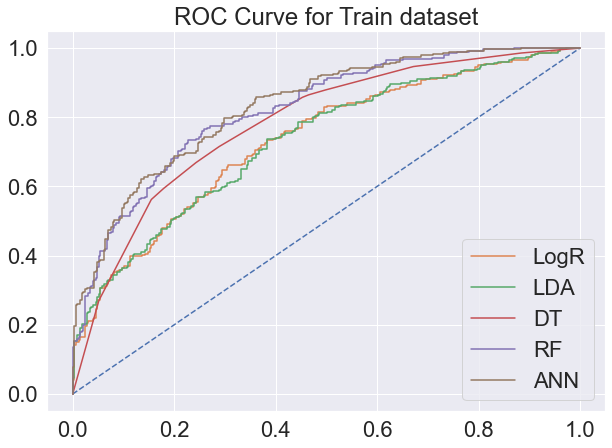

In [1210]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset')
plt.legend(loc='best')
plt.show()


AUC for LogR is: 0.72
AUC for LDA is: 0.71
AUC for DT is: 0.69
AUC for RF is: 0.72
AUC for ANN is: 0.73


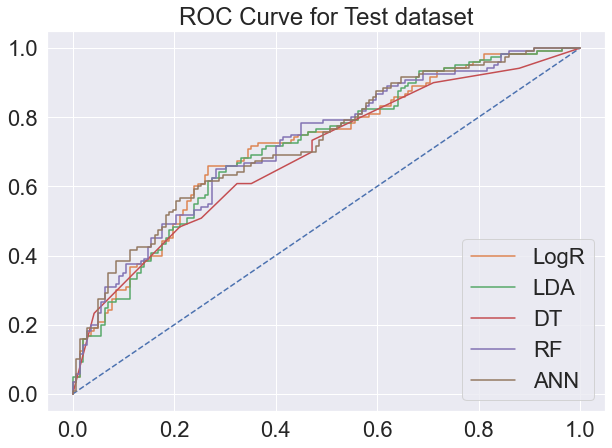

In [1211]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset')
plt.legend(loc='best')
plt.show()

In [1205]:
df2_meteric_comp=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','LDA','Decision Tree','Random Forest', 'ANN']))
#            index=['Logistic Regression','LDA']))
df2_meteric_comp.iloc[0:2,:].T              

,Logistic Regression,LDA
Train Accuracy,0.67,0.66
Test Accuracy,0.66,0.65
Train AUC,0.73,0.73
Test AUC,0.72,0.71
Train Recall,0.57,0.57
Test Recall,0.52,0.52
Train precision,0.66,0.65
Test precision,0.67,0.65
Train f1,0.61,0.61
Test f1,0.58,0.57


In [1207]:
df2_meteric_comp.T

,Logistic Regression,LDA,Decision Tree,Random Forest,ANN
Train Accuracy,0.67,0.66,0.72,0.74,0.74
Test Accuracy,0.66,0.65,0.64,0.67,0.68
Train AUC,0.73,0.73,0.78,0.82,0.83
Test AUC,0.72,0.71,0.69,0.72,0.73
Train Recall,0.57,0.57,0.59,0.66,0.67
Test Recall,0.52,0.52,0.51,0.60,0.62
Train precision,0.66,0.65,0.74,0.75,0.75
Test precision,0.67,0.65,0.63,0.65,0.65
Train f1,0.61,0.61,0.66,0.70,0.71
Test f1,0.58,0.57,0.56,0.62,0.64


<b> On comparing all the models, it looks like that no model is over-fitting/under fitting.

All models test and train score are comparable and within 5-6% range. 

We can see that all models are giving similar results with not much of difference in accuracy. 

Random Forest and Artifical Neural Network gives better f1 score and better recall rate as compared to the logistics/LDA

Among all these models we will go for Artificial Neuro Network MLP classifier as its test f1 score and test accuracy is the highest.
</b>



## Recommendations